
# Session 2 – **Exploratory Data Analysis (EDA)**

This notebook guides you through a practical, end‑to‑end EDA workflow.  
It is a warm up, after you finished it successfully, repeat the process for your own data and work through the steps.

**What you'll do**
1. Load and inspect your dataset
2. Summarize numeric & categorical variables
3. Explore missingness and duplicates
4. Visualize distributions, relationships, and correlations
5. Capture insights in short Markdown notes
6. Draft 2–3 KPI ideas informed by your EDA

**Note:** This notebook intentionally focuses on *EDA only*.  
> Cleaning/feature engineering strategies (e.g., imputation/outlier handling) will be done in the next session.


You might need to download files from:
https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/GTNEJD&version=1.2


## 0) Setup
- Update `DATA_PATH` to your chosen dataset (CSV).  
- If the file is not found, a small **synthetic demo dataset** will be generated so you can still run the notebook end‑to‑end.


In [70]:

import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Display options
pd.set_option("display.max_columns", 300)
pd.set_option("display.width", 120)

# ---- Path to your CSV ----
# If you have the Harvard PeopleSuN dataset in your data folder from last session, copy it
# in the data folder of this week and set the path like:
DATA_PATH = "PS4_GamesSales.xlsx"  

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)



## 1) Load Data
- Try to read the CSV at `DATA_PATH`.
- If not found, we build a small **synthetic dataset** to let you proceed.


In [71]:

# def make_synthetic_demo(n=1000):
#     # Toy dataset with mixed types: numeric, categorical, date, and some missingness
#     dates = pd.date_range("2021-01-01", periods=n, freq="D")
#     region = np.random.choice(["North","South","East","West"], size=n, p=[0.25,0.25,0.25,0.25])
#     income = np.random.lognormal(mean=10, sigma=0.5, size=n)  # heavily skewed
#     pop_density = np.random.gamma(shape=2.0, scale=50, size=n)
#     electrified = np.random.binomial(n=1, p=np.clip(0.3 + 0.001*(pop_density) + 0.00001*(income), 0.05, 0.95))
#     # insert some missingness
#     income[np.random.choice(n, size=n//15, replace=False)] = np.nan
#     pop_density[np.random.choice(n, size=n//20, replace=False)] = np.nan
#     # a few duplicates
#     df = pd.DataFrame({
#         "date": dates,
#         "region": region,
#         "income": income,
#         "population_density": pop_density,
#         "electrified": electrified
#     })
#     df = pd.concat([df, df.sample(5, random_state=RANDOM_SEED)], ignore_index=True)
#     return df

if os.path.exists(DATA_PATH):
    df = pd.read_excel(DATA_PATH)
    source_note = f"Loaded dataset from: {DATA_PATH}"
# else:
#     df = make_synthetic_demo(n=1200)
#     source_note = "Using synthetic demo dataset (file not found)."

source_note, df.head()


('Loaded dataset from: PS4_GamesSales.xlsx',
                         Game    Year             Genre       Publisher  North America  Europe  Japan  Rest of World  \
 0         Grand Theft Auto V  2014.0            Action  Rockstar Games           6.06    9.71   0.60           3.02   
 1  Call of Duty: Black Ops 3  2015.0           Shooter      Activision           6.18    6.05   0.41           2.44   
 2      Red Dead Redemption 2  2018.0  Action-Adventure  Rockstar Games           5.26    6.21   0.21           2.26   
 3         Call of Duty: WWII  2017.0           Shooter      Activision           4.67    6.21   0.40           2.12   
 4                    FIFA 18  2017.0            Sports       EA Sports           1.27    8.64   0.15           1.73   
 
    Global  
 0   19.39  
 1   15.09  
 2   13.94  
 3   13.40  
 4   11.80  )


## 2) First Look
**Questions**
- What do rows represent? What does each column mean?
- Do we recognize numeric vs categorical vs datetime columns?


In [72]:

print(source_note)
print("\nShape:", df.shape)
print("\nColumns:", list(df.columns))
print("\nInfo:")
print(df.info())
#display(df.head(10))


Loaded dataset from: PS4_GamesSales.xlsx

Shape: (1034, 9)

Columns: ['Game', 'Year', 'Genre', 'Publisher', 'North America', 'Europe', 'Japan', 'Rest of World', 'Global']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           825 non-null    float64
 2   Genre          1034 non-null   object 
 3   Publisher      825 non-null    object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB
None


To make your EDA more interpretable:

### a) Load and inspect the codebook

If you have something like peoplesun_codebook.csv or .xlsx:

In [14]:
codebook = pd.read_excel("PS4_GamesSales.xlsx")
display(codebook.head())

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


### b) Build a quick lookup dictionary

In [17]:
mapping = dict(zip(codebook["Game"], codebook["Publisher"]))
df_renamed = df.rename(columns=mapping)


You have now replaced the code for questions with the full question.


In [18]:
df_renamed.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


Note that some columns are staying as codes, these are flattened options that were made out of answers to the last question.
Example: 211. Can you list ALL of the income sources of your household?
Then the following collumns represent options 1 to 14. The options can be found in choicebook.

In [73]:
df_renamed= df_renamed.replace(0,np.nan)
df_renamed= df_renamed.replace(0.0,np.nan)
df_renamed=df_renamed.dropna()

In [74]:
df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 0 to 481
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           252 non-null    object 
 1   Year           252 non-null    float64
 2   Genre          252 non-null    object 
 3   Publisher      252 non-null    object 
 4   North America  252 non-null    float64
 5   Europe         252 non-null    float64
 6   Japan          252 non-null    float64
 7   Rest of World  252 non-null    float64
 8   Global         252 non-null    float64
dtypes: float64(6), object(3)
memory usage: 19.7+ KB



## 3) Data Types & Basic Hygiene (EDA-only)
- Identify numeric, categorical, datetime columns.


In [50]:
# Identify column types
numeric_cols = df_renamed.select_dtypes(include=[np.number]).columns.tolist()
datetime_cols = df_renamed.select_dtypes(include=["datetime64[ns]", "datetime64[ns, UTC]"]).columns.tolist()
categorical_cols = [c for c in df_renamed.columns if c not in numeric_cols + datetime_cols]

print("Numeric:", numeric_cols)
# Print a line to separate long lists
print("-" * 40)
print("Datetime:", datetime_cols)
print("-" * 40)
print("Categorical/Other:", categorical_cols)


Numeric: ['Year', 'North America', 'Europe', 'Japan', 'Rest of World', 'Global']
----------------------------------------
Datetime: []
----------------------------------------
Categorical/Other: ['Game', 'Genre', 'Publisher']



## 4) Descriptive Statistics
Use `.describe()` for numeric and a custom summary for categorical columns.


In [51]:

numeric_summary = df_renamed[numeric_cols].describe().T if numeric_cols else pd.DataFrame()
categorical_summary = pd.DataFrame({
    "n_unique": [df_renamed[c].nunique(dropna=True) for c in categorical_cols],
    "top_values": [df_renamed[c].value_counts(dropna=False).head(5).to_dict() for c in categorical_cols]
}, index=categorical_cols) if categorical_cols else pd.DataFrame()

display(numeric_summary.head(5))
display(categorical_summary.head(5))


,count,mean,std,min,25%,50%,75%,max
Year,252.0,2015.757937,1.312268,2013.00,2015.00,2016.00,2017.0000,2018.00
North America,252.0,0.658175,0.958331,0.02,0.11,0.29,0.7900,6.18
Europe,252.0,0.891786,1.393080,0.01,0.12,0.41,1.0400,9.71
Japan,252.0,0.113770,0.195282,0.01,0.03,0.06,0.1225,2.17
Rest of World,252.0,0.301389,0.430439,0.01,0.05,0.13,0.3725,3.02


,n_unique,top_values
Game,252,"{'Grand Theft Auto V': 1, 'Call of Duty: Black..."
Genre,13,"{'Action': 65, 'Role-Playing': 44, 'Shooter': ..."
Publisher,36,"{'Square Enix': 27, 'Namco Bandai Games': 22, ..."



## 5) Missingness Overview
- Which columns have missing values? 


In [52]:

missing = df_renamed.isna().mean().sort_values(ascending=False)
missing = (missing * 100).round(2).rename("%missing")
display(missing.to_frame().head(30))


,%missing
Game,0.0
Year,0.0
Genre,0.0
Publisher,0.0
North America,0.0
Europe,0.0
Japan,0.0
Rest of World,0.0
Global,0.0



## 6) Duplicate Awareness
- How many duplicated rows exist?


In [53]:

dup_count = int(df_renamed.duplicated().sum())
total = len(df_renamed)
print(f"Duplicated rows: {dup_count} / {total} ({dup_count/total*100:.2f}%)")


Duplicated rows: 0 / 252 (0.00%)



## 7) Distributions (Numeric)
- Histograms help reveal shape, skew, and potential outliers.
> Tip: For skewed variables (e.g., income), you can inspect both linear and log scales. We don't have any here.


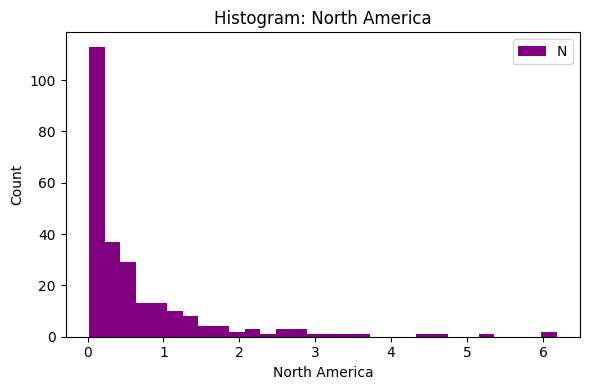

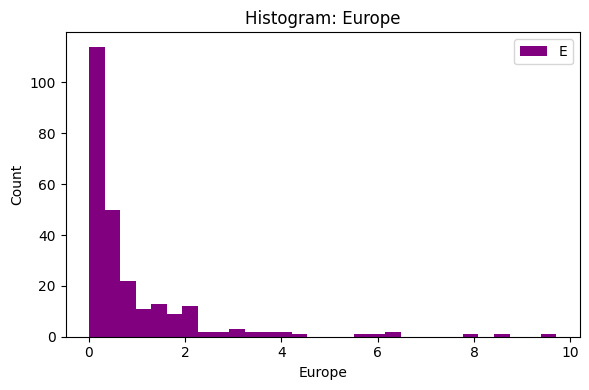

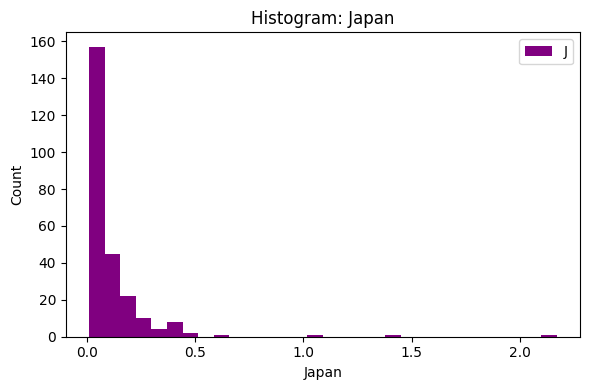

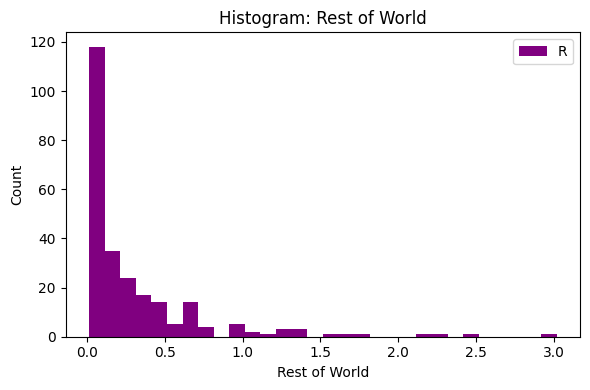

In [54]:

def plot_histograms(frame, columns, bins=30, logscale_candidates=None):
    for col in columns:
        data = frame[col].dropna()
        if data.empty:
            continue
        plt.figure(figsize=(6,4))
        plt.hist(data, bins=bins, color="Purple")
        plt.title(f"Histogram: {col}")
        plt.legend(col)
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

plot_histograms(df_renamed, numeric_cols[1:5], bins=30)


You see that most of numerical columns are actually boleans or not relevant as histograms, we use smarter approach to visualize our columns:

In [58]:
def is_boolish(s: pd.Series):
    # True booleans or 0/1 only (ignoring NaN)
    if s.dtype == bool:
        return True
    if np.issubdtype(s.dtype, np.number):
        uniq = pd.unique(s.dropna())
        return set(uniq).issubset({0, 1})
    # string-y 'yes/no/true/false/1/0'
    if s.dtype == object:
        vals = s.dropna().astype(str).str.lower().unique()
        return set(vals).issubset({"0","1","true","false","yes","no"})
    return False

def is_continuous_numeric(s: pd.Series, small_card_max=12):
    if not np.issubdtype(s.dropna().dtype, np.number):
        return False
    nunq = s.nunique(dropna=True)
    # treat as continuous if reasonably many distinct values
    return nunq > small_card_max

def weighted_counts(series, weights=None):
    if weights is None:
        vc = series.value_counts(dropna=False)
        return (vc / vc.sum() * 100).sort_values(ascending=False)  # percent
    dfw = pd.DataFrame({"val": series})
    dfw["_w"] = weights
    out = dfw.groupby("val", dropna=False)["_w"].sum()
    return (out / out.sum() * 100).sort_values(ascending=False)

def smart_univariate_plot(df, col, weight_col=None, bins=30, top=12, likert_order=None):
    s = df[col]
    w = df[weight_col] if weight_col and weight_col in df.columns else None

    # 1) Boolean / multi-select dummy
    if is_boolish(s):
        # Normalize different encodings to True/False
        if s.dtype != bool:
            s = s.astype(str).str.lower().isin(["1","true","yes"])
        pct = weighted_counts(s.fillna(False), weights=w)
        plt.figure(figsize=(5,3.5))
        plt.bar(pct.index.astype(str), pct.values)
        plt.ylabel("% of records")
        plt.title(f"{col} (boolean)")
        plt.tight_layout()
        plt.show()
        return

    # 2) Continuous numeric
    if is_continuous_numeric(s):
        data = s.dropna().values
        if data.size == 0: 
            return
        plt.figure(figsize=(6,4))
        plt.hist(data, bins=bins,color='Yellow')
        plt.title(f"Histogram: {col}")
        plt.xlabel(col); plt.ylabel("Count"); plt.tight_layout(); plt.show()

        # optional log view if highly skewed (skewness > 1)
        skew = pd.Series(data).skew()
        if np.isfinite(skew) and skew > 1 and (data > 0).mean() > 0.95:
            plt.figure(figsize=(6,4))
            plt.hist(np.log1p(data[data>0]), bins=bins,color='Yellow')
            plt.title(f"Histogram (log1p): {col}")
            plt.xlabel(f"log1p({col})"); plt.ylabel("Count"); plt.tight_layout(); plt.show()
        return

    # 3) Small-cardinality numeric (coded categories) OR text/object
    if likert_order is not None and set(pd.unique(s.dropna())) <= set(likert_order):
        # ordered bars for Likert (e.g., [1,2,3,4,5])
        ordered = pd.Categorical(s, categories=likert_order, ordered=True)
        pct = weighted_counts(ordered, weights=w)
    else:
        pct = weighted_counts(s.astype("object"), weights=w)

    pct = pct.head(top)
    plt.figure(figsize=(7,4))
    plt.bar([str(i) for i in pct.index], pct.values)
    plt.xticks(rotation=35, ha="right")
    plt.ylabel("% of records")
    plt.title(f"{col} (top {top})")
    plt.tight_layout()
    plt.show()

def plot_eda_overview(df, cols=None, weight_col=None, bins=30, top=12):
    """Plot a sensible chart per column; if cols=None, sample a few from each type."""
    if cols is None:
        # Heuristics to pick a manageable subset automatically
        boolish = [c for c in df.columns if is_boolish(df[c])]
        continuous = [c for c in df.columns if is_continuous_numeric(df[c])]
        smallcat = [c for c in df.columns 
                    if (not is_boolish(df[c])) and (not is_continuous_numeric(df[c]))]

        cols = []
        cols += boolish[:6]
        cols += continuous[:6]
        cols += smallcat[:8]

    for c in cols:
        try:
            smart_univariate_plot(df, c, weight_col=weight_col, bins=bins, top=top)
        except Exception as e:
            print(f"[skip] {c}: {e}")


### Now plot using the above defined functions

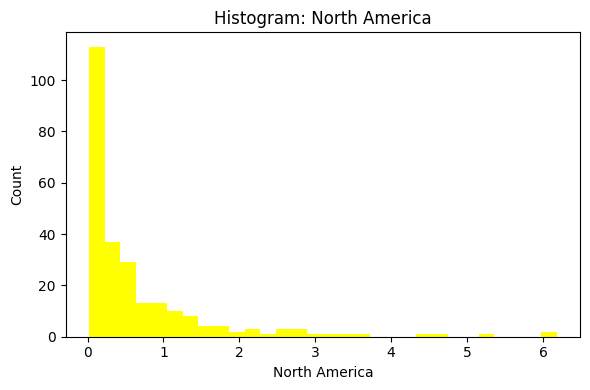

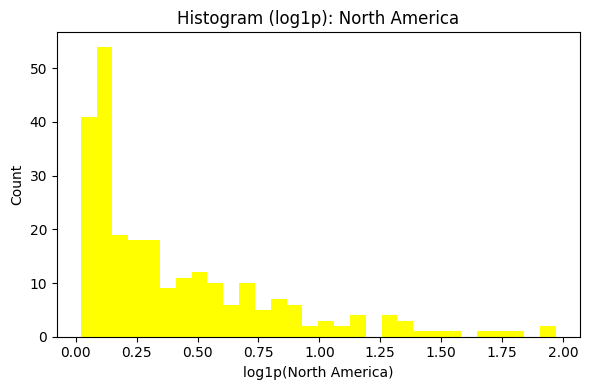

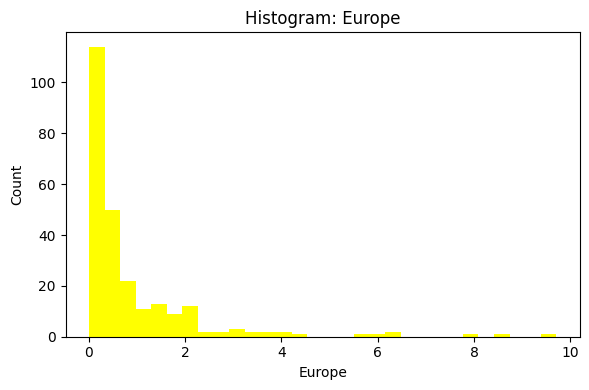

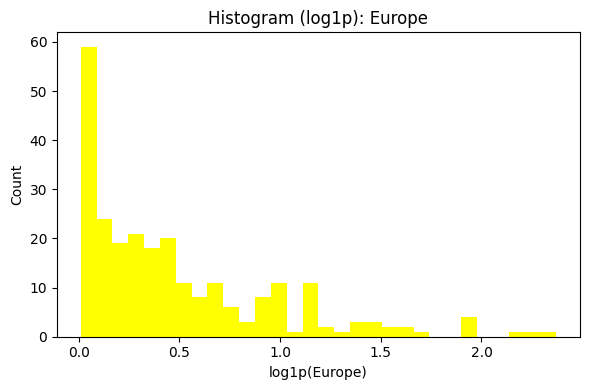

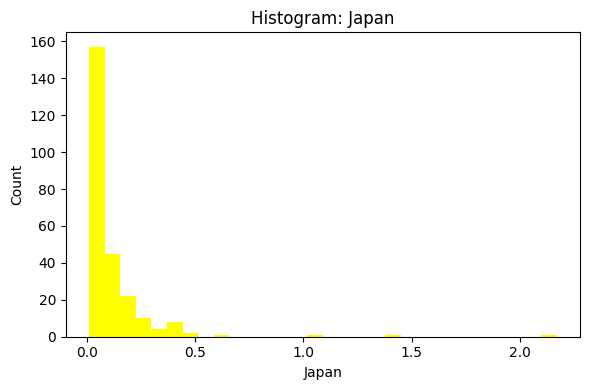

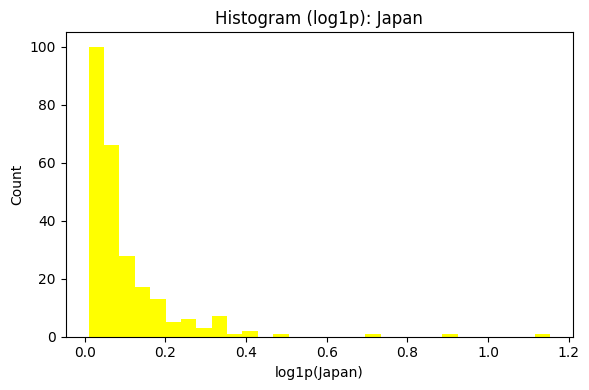

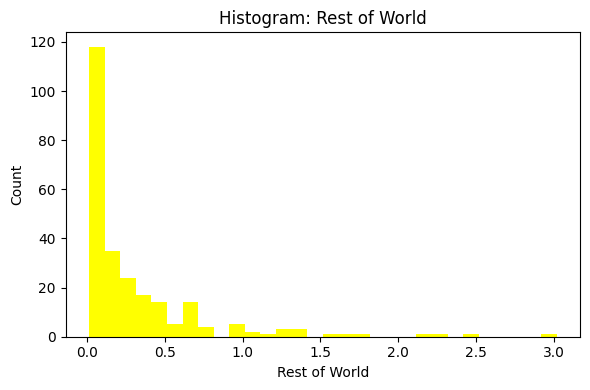

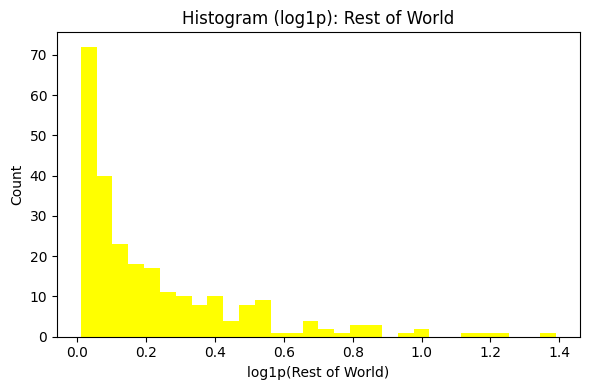

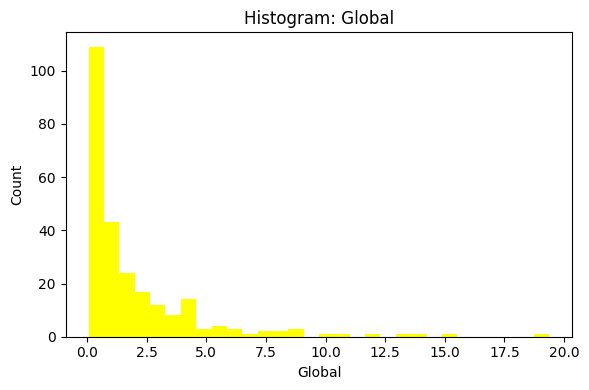

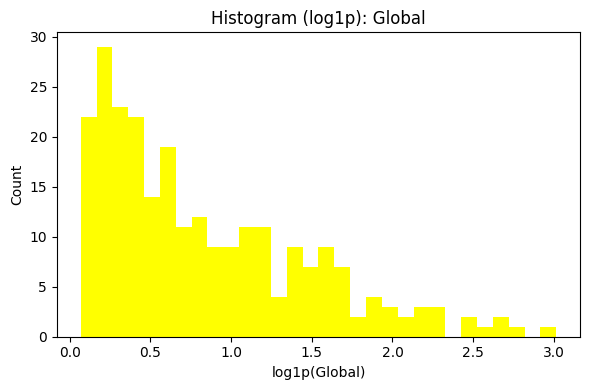

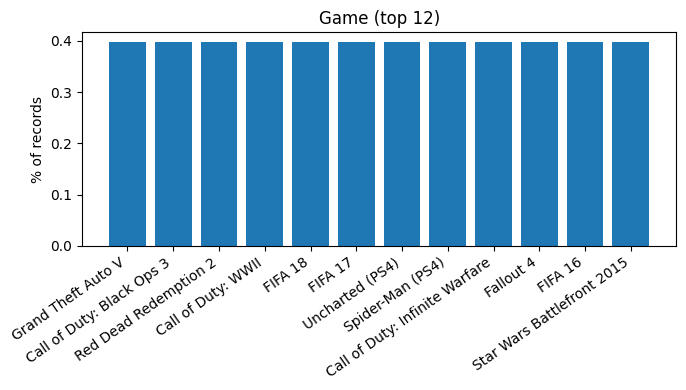

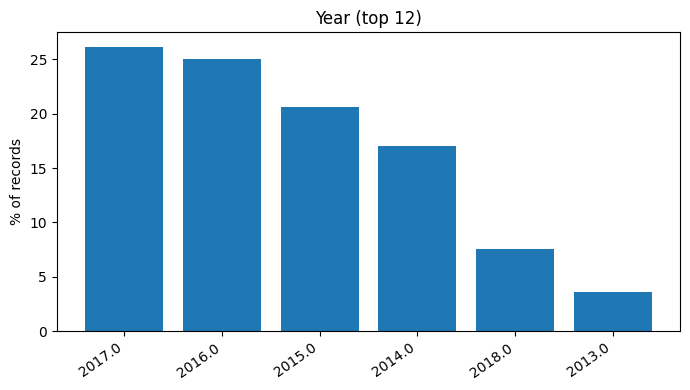

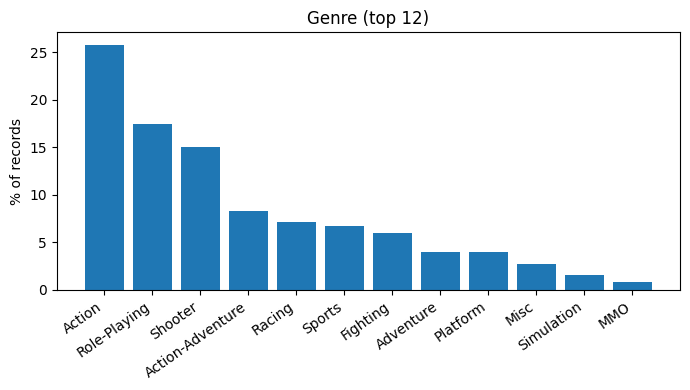

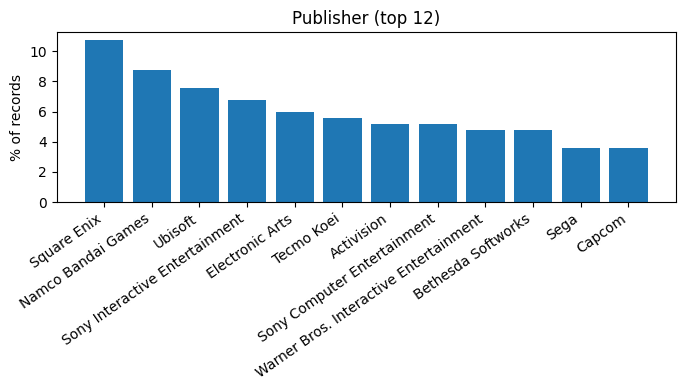

In [59]:
plot_eda_overview(df_renamed, weight_col="natweight", bins=30, top=12)

### Or explicitly pick columns you care about:


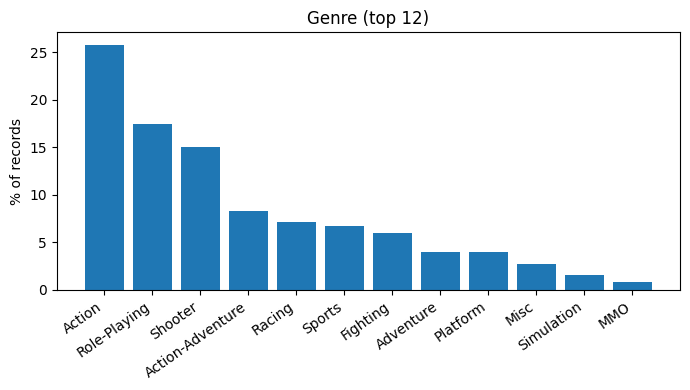

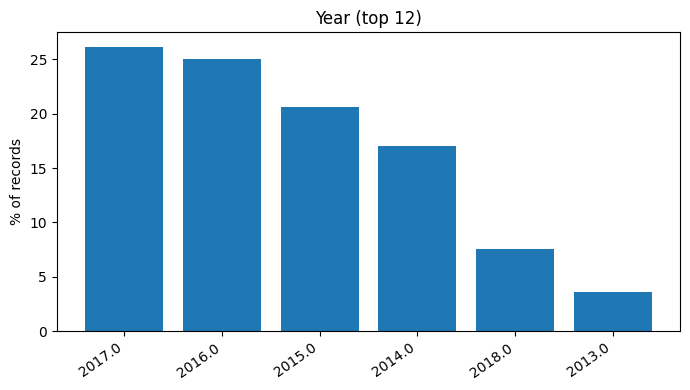

In [61]:
cols = [
    "Genre", "Year"
]
plot_eda_overview(df_renamed, cols=cols, weight_col="natweight")


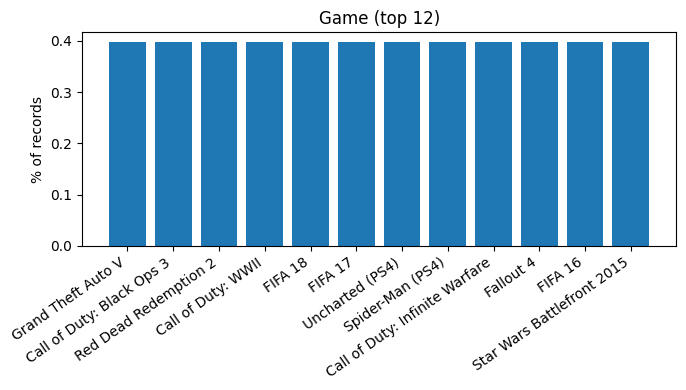

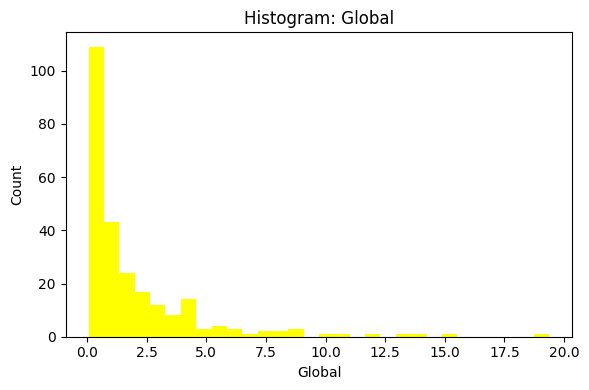

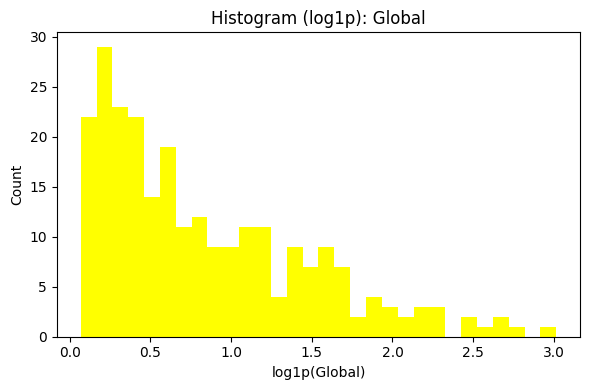

In [62]:
cols = [
    "Game", "Global"
]
plot_eda_overview(df_renamed, cols=cols, weight_col="natweight")



## 8) Numeric vs Categorical
- Compare distributions of a numeric variable **across categories** (group summaries).


In [64]:

def grouped_summary(frame, num_col, cat_col):
    g = frame[[num_col, cat_col]].dropna().groupby(cat_col)[num_col]
    summary = pd.DataFrame({
        "count": g.count(),
        "mean": g.mean(),
        "median": g.median(),
        "std": g.std()
    }).sort_values("mean", ascending=False)
    return summary

# Print grouped summaries for the first few combinations
for cat in categorical_cols[:2]:
    for num in numeric_cols[:3]:
        print(f"\n--- {num} by {cat} ---")
        display(grouped_summary(df_renamed, num, cat).head(10))



--- Year by Game ---


,count,mean,median,std
Game,,,,
Bravo Team VR,1,2018.0,2018.0,NaN
Attack on Titan 2,1,2018.0,2018.0,NaN
Dragon Ball Fighter Z,1,2018.0,2018.0,NaN
Dissidia Final Fantasy NT,1,2018.0,2018.0,NaN
Detroit: Become Human,1,2018.0,2018.0,NaN
Hokuto ga Gotoku,1,2018.0,2018.0,NaN
Far Cry 5,1,2018.0,2018.0,NaN
EA Sports UFC 3,1,2018.0,2018.0,NaN
God of War (PS4),1,2018.0,2018.0,NaN



--- North America by Game ---


,count,mean,median,std
Game,,,,
Call of Duty: Black Ops 3,1,6.18,6.18,NaN
Grand Theft Auto V,1,6.06,6.06,NaN
Red Dead Redemption 2,1,5.26,5.26,NaN
Call of Duty: WWII,1,4.67,4.67,NaN
Uncharted (PS4),1,4.49,4.49,NaN
Spider-Man (PS4),1,3.64,3.64,NaN
Star Wars Battlefront 2015,1,3.31,3.31,NaN
Call of Duty: Infinite Warfare,1,3.11,3.11,NaN
Fallout 4,1,2.91,2.91,NaN



--- Europe by Game ---


,count,mean,median,std
Game,,,,
Grand Theft Auto V,1,9.71,9.71,NaN
FIFA 18,1,8.64,8.64,NaN
FIFA 17,1,7.95,7.95,NaN
Call of Duty: WWII,1,6.21,6.21,NaN
Red Dead Redemption 2,1,6.21,6.21,NaN
Call of Duty: Black Ops 3,1,6.05,6.05,NaN
FIFA 16,1,5.77,5.77,NaN
FIFA 15,1,4.49,4.49,NaN
Fallout 4,1,3.97,3.97,NaN



--- Year by Genre ---


,count,mean,median,std
Genre,,,,
Strategy,1,2017.000000,2017.0,NaN
Simulation,4,2016.250000,2016.5,0.957427
Platform,10,2016.100000,2017.0,1.449138
Fighting,15,2016.066667,2016.0,1.279881
Role-Playing,44,2016.022727,2016.0,1.109968
Action,65,2015.923077,2016.0,1.266241
Racing,18,2015.833333,2016.0,1.339447
Adventure,10,2015.700000,2016.0,1.251666
MMO,2,2015.500000,2015.5,2.121320



--- North America by Genre ---


,count,mean,median,std
Genre,,,,
Shooter,38,1.254737,0.820,1.348057
Action-Adventure,21,0.996667,0.470,1.326549
Sports,17,0.922353,0.830,0.819554
Action,65,0.638615,0.240,1.037690
Role-Playing,44,0.442500,0.210,0.576796
Platform,10,0.416000,0.175,0.385809
Misc,7,0.411429,0.130,0.659253
Fighting,15,0.314000,0.210,0.238621
Adventure,10,0.290000,0.190,0.217970



--- Europe by Genre ---


,count,mean,median,std
Genre,,,,
Sports,17,2.037059,0.570,2.831843
Shooter,38,1.481579,0.915,1.517750
Action-Adventure,21,1.271905,0.780,1.450995
Misc,7,0.822857,0.230,1.126643
Action,65,0.796000,0.330,1.384200
Platform,10,0.707000,0.385,0.841283
Racing,18,0.705000,0.460,0.655701
Role-Playing,44,0.455455,0.190,0.768570
Adventure,10,0.406000,0.210,0.379713



## 9) Correlation Matrix (for continious numeric Only)
- Use with care: correlation ≠ causation.
- Still, helpful for spotting redundant features or strong linear relationships.


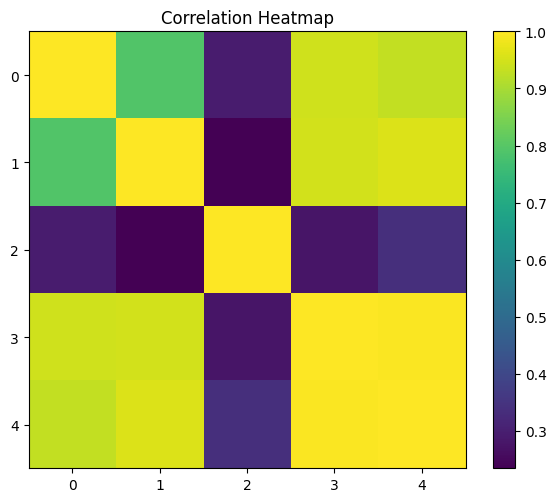

,North America,Europe,Japan,Rest of World,Global
North America,1.000,0.793,0.293,0.945,0.929
Europe,0.793,1.000,0.235,0.949,0.958
Japan,0.293,0.235,1.000,0.278,0.339
Rest of World,0.945,0.949,0.278,1.000,0.997
Global,0.929,0.958,0.339,0.997,1.000


In [65]:
# Filter only continuous numeric columns from your existing numeric_cols list
cont_cols = [c for c in numeric_cols if is_continuous_numeric(df_renamed[c])]
cont_cols = cont_cols[:10]  # keep the first 5 for visualization

if len(cont_cols) >= 2:
    corr = df_renamed[cont_cols].corr(numeric_only=True)
    plt.figure(figsize=(6,5))
    plt.imshow(corr, interpolation="nearest")
    plt.title("Correlation Heatmap")
    plt.colorbar()
    # Optional labels:
    # ticks = range(len(corr.columns))
    # plt.xticks(ticks, corr.columns, rotation=90)
    # plt.yticks(ticks, corr.columns)
    plt.tight_layout()
    plt.show()
    display(corr.round(3))
else:
    print("Not enough continuous numeric columns to correlate.")

You could also experiment with seaborn sns.pairplot() to see nice visualisations that match two columns.

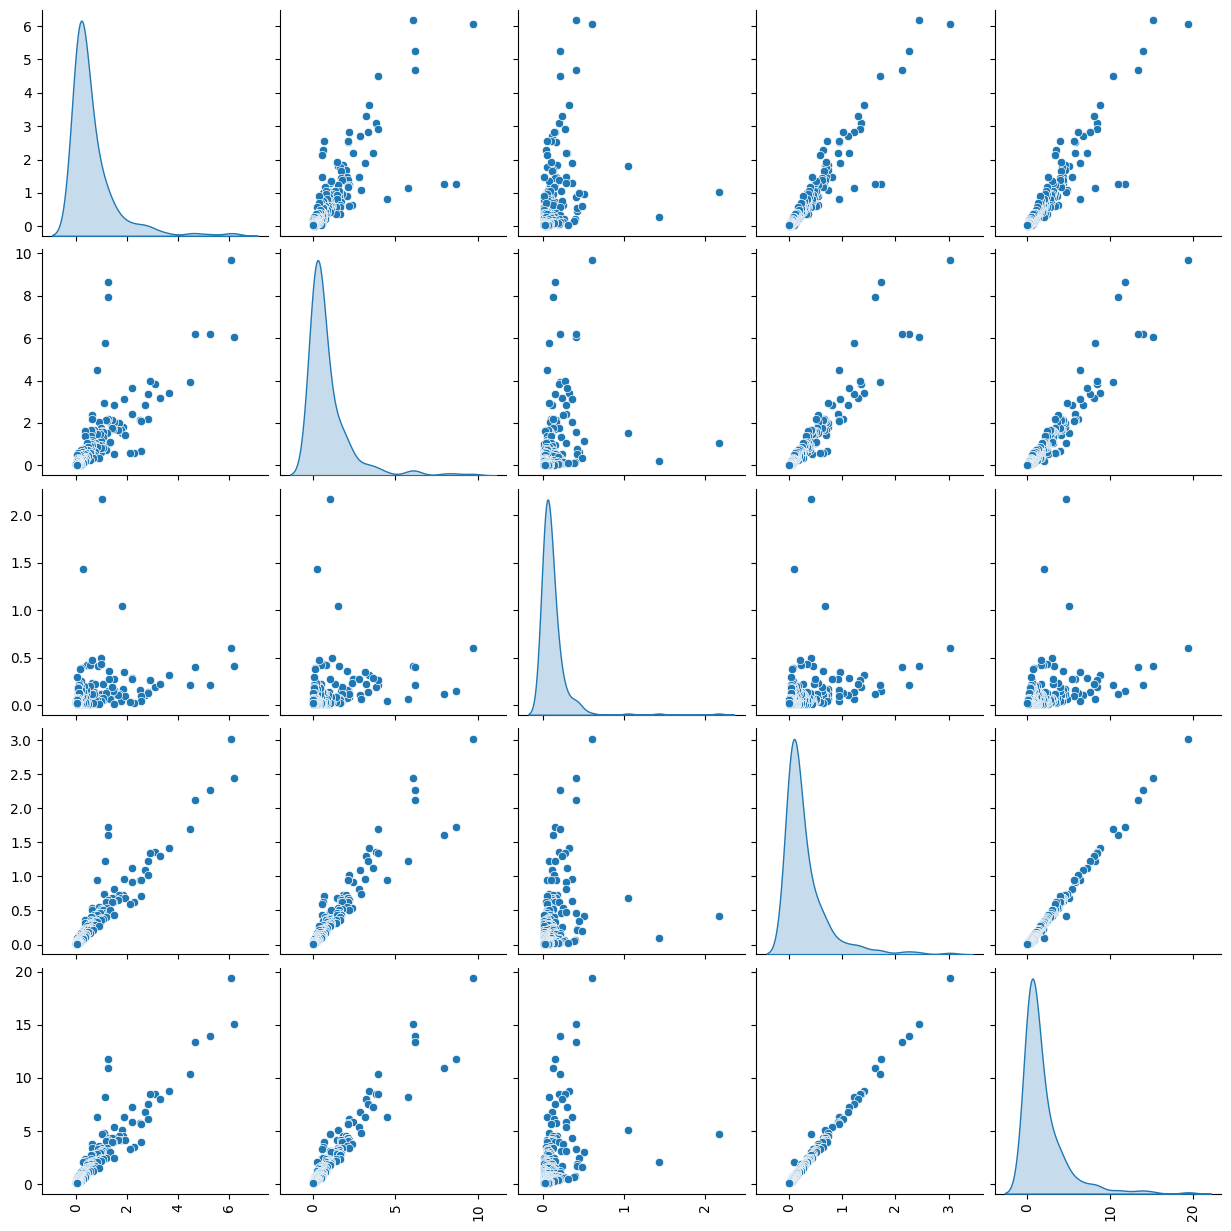

In [66]:
import seaborn as sns
cont_cols = [c for c in numeric_cols if is_continuous_numeric(df_renamed[c])]

# Create the pair plot
g = sns.pairplot(df_renamed[cont_cols[:5]], diag_kind="kde")

for ax in g.axes.flatten():
    # ticks
    ax.tick_params(axis="x", labelrotation=90)
    ax.tick_params(axis="y", labelrotation=0)

    # axis titles (labels)
    ax.set_xlabel("")
    #ax.set_ylabel(ax.get_ylabel(), rotation=45,  ha="right", va="center", labelpad=10)
    ax.set_ylabel("")

g.tight_layout()
plt.show()



## 10) Time Trends
- If you had a datetime column which we don't in the PeopleSuN data: Aggregate by day/week/month and plot trends.


In [67]:

def plot_time_series(frame, date_col, value_col, freq="M"):
    sub = frame[[date_col, value_col]].dropna().copy()
    if sub.empty:
        print(f"No data to plot for {value_col}.")
        return
    sub = sub.set_index(date_col).sort_index().resample(freq).mean()
    plt.figure(figsize=(7,4))
    plt.plot(sub.index, sub[value_col])
    plt.title(f"Time Trend ({value_col}, resampled {freq})")
    plt.xlabel("Date")
    plt.ylabel(value_col)
    plt.tight_layout()
    plt.show()

if datetime_cols and numeric_cols:
    date_col = datetime_cols[0]
    for v in numeric_cols[:3]:
        plot_time_series(df_renamed, date_col, v, freq="M")



## 11) Geographic Hints
If you have **region/country** columns, consider:  
- Choropleth (later in Streamlit), or  
- Per‑region summary tables now.


In [68]:
# 1) keep only continuous numeric columns (not coded ints / dummies)
cont_cols = [c for c in numeric_cols if is_continuous_numeric(df_renamed[c])]
geo_like = [c for c in df_renamed.columns if any(k in c.lower() for k in ["zone","lga","eaid"])]
for geo in geo_like:
    for num in cont_cols[:2]:
        print(f"\nAverage {num} by {geo}:")
        display(df_renamed.groupby(geo, dropna=False)[num].mean().sort_values(ascending=True).to_frame().head(5))



## 12) Write Down 2–3 Insights (Markdown)
Use this cell to note **what surprised you**, **potential data issues**, and **early hypotheses**.

- Insight 1: The games which sold less are more in quantity
- Insight 2: 25% of the games belong to the Action genre.
- Insight 3: The dataset contains huge number of null values.
- Hypothesis / Next question: Which genre has most number of sales? 



## 13) KPI Drafts (Driven by EDA)
Fill in a first draft of KPIs **based on variables that are present and meaningful** in your dataset.

| KPI Name | Definition | Formula (words) | Python Expression (sketch) |
|---|---|---|---|
|Top Genre contribution |share of global sales from the most popular genre | sales of top genre/ Total global sales | `df. groupby['Genre']('Global').sum().max() / df['global sales'].sum()` |
|  |  |  |  |
|  |  |  |  |

> Keep KPIs **simple and measurable**. We’ll refine them after cleaning/feature engineering.



## 14) What We'll Tackle Next (Feature Engineering Preview)
- Data type fixes (categorical, datetime)  
- Missing value strategies (when to impute vs. drop)  
- Outlier detection & robust statistics  
- Scaling/encoding and derived features for your KPIs  